In [14]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
# Set random seed
np.random.seed(42)        

### Load data

In [16]:
# Load csv file
df = pd.read_csv('data/framingham.csv')

print(df.shape)
# View top 5 rows
df.head()

(4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Exploratory Data Analysis

Text(0.5, 1.0, 'Male/Female Ratio')

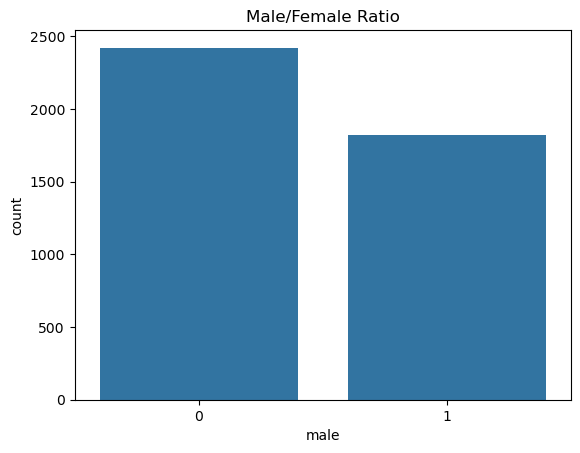

In [17]:
# Visualize male/female ratio
sns.countplot(x=df["male"]).set_title("Male/Female Ratio")

Text(0.5, 1.0, 'Outcome Count')

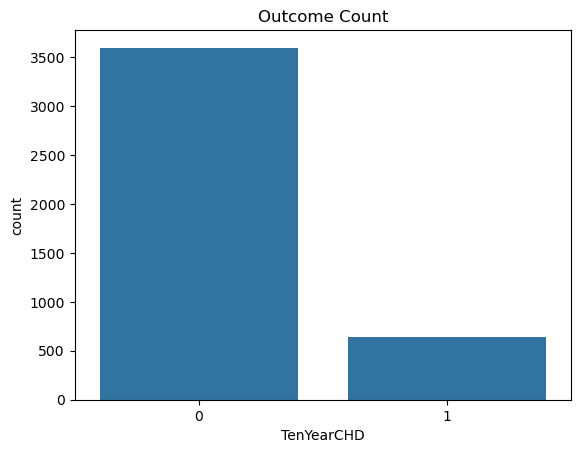

In [18]:
# Visualize the classes distributions
sns.countplot(x=df["TenYearCHD"]).set_title("Outcome Count")

Text(0.5, 1.0, 'Outcome Count by Gender')

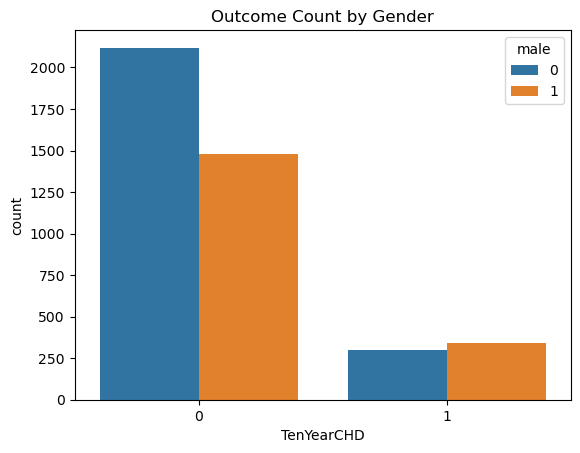

In [19]:
# Visualize the classes distributions by gender
sns.countplot(x="TenYearCHD", hue="male", data=df).set_title('Outcome Count by Gender')

**Insights**

*Qué podemos aprender de estos gráficos?*

#### Data Cleaning

In [20]:
# Check if there are any null values
df.isnull().values.any()

True

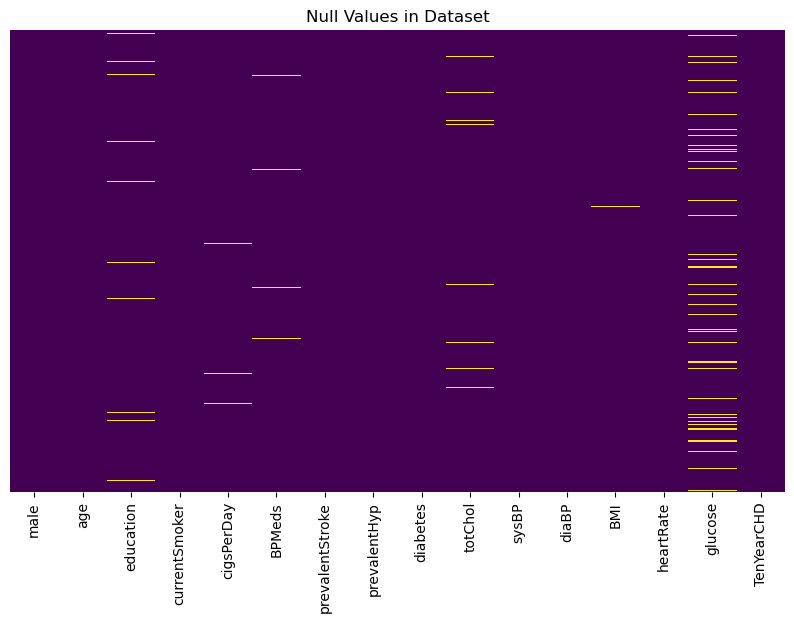

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Null Values in Dataset")
plt.show()


In [22]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
null_counts = df.isnull().sum()
null_counts

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [23]:
# Remove null values
df = df.dropna()

# Check if there are any null values
df.isnull().values.any()

False

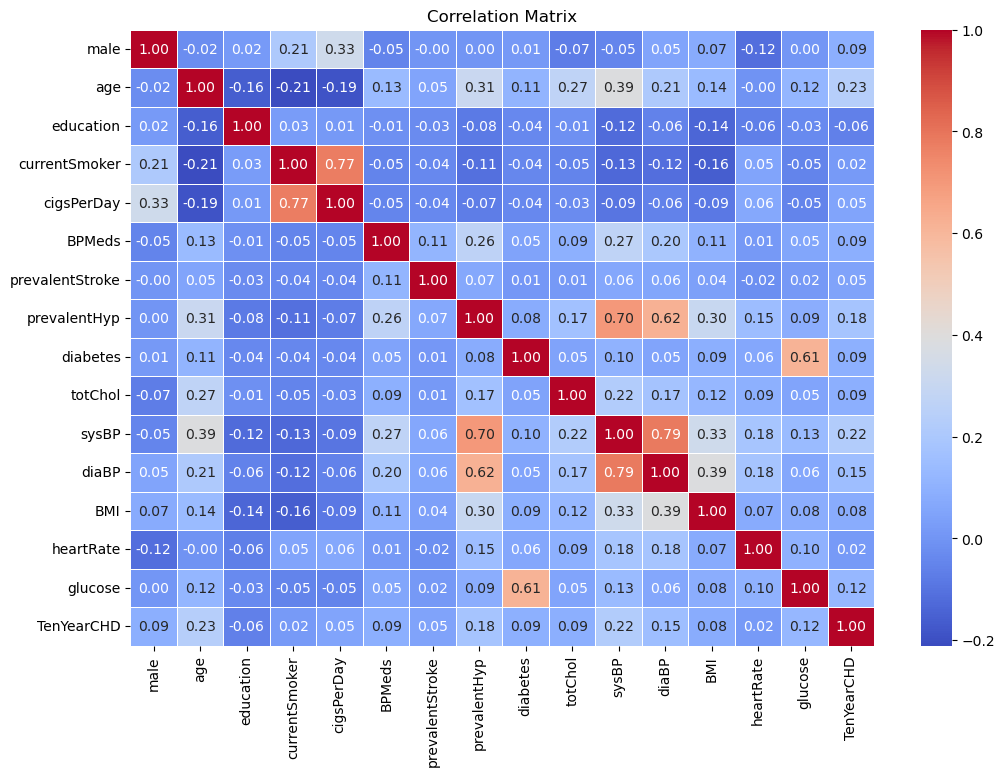

In [24]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [25]:
# Specify features columns
X = df.drop(columns="TenYearCHD", axis=0)

# Specify target column
y = df["TenYearCHD"]

#### Data balancing

Documentación para trabajo con datos desbalanceados: [imbalanced-learn.org](https://imbalanced-learn.org)


Text(0.5, 1.0, 'Balanced Data Set')

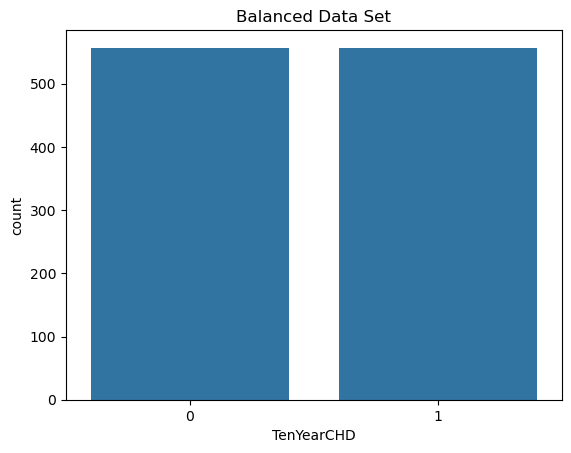

In [26]:
# Import required library for resampling
from imblearn.under_sampling import RandomUnderSampler

# Instantiate Random Under Sampler
rus = RandomUnderSampler(random_state=42)

# Perform random under sampling
df_data, df_target = rus.fit_resample(X, y)

X = df_data
y = df_target

# Visualize new classes distributions
sns.countplot(x = df_target).set_title('Balanced Data Set')

### Model building and evaluation

#### Ventajas de cada clasificador en el contexto de predicción de enfermedades

##### 1. Naive Bayes
- **Simplicidad y rapidez**: Naive Bayes es fácil de implementar y muy rápido, lo que lo hace adecuado para aplicaciones en tiempo real y grandes volúmenes de datos.
- **Manejo de variables categóricas**: Es ideal para trabajar con variables categóricas (por ejemplo, presencia de síntomas, resultados de pruebas) y puede manejar características con distribuciones desconocidas de manera eficiente.
- **Poca necesidad de datos**: Puede funcionar bien incluso con pequeños conjuntos de datos, lo que es útil cuando los datos históricos de enfermedades son limitados.
- **Probabilidades como salida**: Naive Bayes proporciona una estimación de la probabilidad de pertenencia a cada clase, lo cual es útil para tomar decisiones más informadas en contextos de salud.

##### 2. Support Vector Machine (SVM)
- **Eficaz en problemas no lineales**: SVM es muy eficaz cuando las clases no son linealmente separables, lo cual es común en los datos médicos, donde los patrones pueden ser complejos.
- **Robustez ante el sobreajuste**: SVM busca maximizar el margen entre las clases, lo que hace que el modelo sea menos susceptible al sobreajuste, especialmente en situaciones con características ruidosas.
- **Capacidad de trabajar en espacios de alta dimensión**: En medicina, donde pueden existir muchos factores (síntomas, factores genéticos, etc.), SVM es útil para trabajar con datos de alta dimensión sin perder poder de generalización.
- **Manejo de marginado pequeño de clases**: Aunque las clases estén desbalanceadas, SVM puede encontrar un margen óptimo para separar las clases, lo que ayuda a mejorar las predicciones.

##### 3. Árbol de Decisión
- **Interpretabilidad**: Los árboles de decisión son fáciles de interpretar y entender, lo cual es crucial en un contexto médico donde los profesionales necesitan saber cómo se llegó a una conclusión.
- **No requiere preprocesamiento complejo**: Los árboles de decisión no requieren que los datos estén normalizados o estandarizados, lo que simplifica el proceso de preparación de los datos.
- **Flexibilidad**: Los árboles de decisión pueden capturar patrones complejos, lo que permite representar de manera eficaz situaciones complejas en el diagnóstico de enfermedades.

##### 4. Regresión Logística
- **Simplicidad y eficiencia**: La regresión logística es simple de implementar, rápida de entrenar y generalmente eficiente, lo que la hace adecuada para modelos en tiempo real en el diagnóstico de enfermedades.
- **Probabilidades como salida**: Al igual que Naive Bayes, la regresión logística también proporciona probabilidades, lo que permite una toma de decisiones más informada y basada en la confianza del modelo en su predicción.
- **Fácil de interpretar**: Los coeficientes de la regresión logística son relativamente fáciles de interpretar, lo que facilita entender el impacto de cada característica en la predicción del diagnóstico.
- **Eficiencia en problemas lineales**: Si las relaciones entre las características y la clase son lineales (o casi lineales), la regresión logística puede ser muy eficaz y producir buenos resultados rápidamente.


In [27]:
# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
gnb_model = GaussianNB()

In [28]:
# Import required libraries for performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Define dictionary with performance metrics
scoring = {'accuracy':accuracy_score, 
           'precision':precision_score,
           'recall':recall_score, 
           'f1_score':f1_score}

In [29]:
# Split the dataset into train, validation, and test sets
test_size=0.2 
val_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=42)

In [30]:
# Dictionary of models to evaluate
models = {
    'Logistic Regression': log_model, 
    'Support Vector Classifier': svc_model,
    'Decision Tree': dtr_model,
    'Gaussian Naive Bayes': gnb_model
}

scores = {name: [] for name in (['Model', 'Dataset'] + list(scoring.keys()))}


In [31]:
# Evaluate each model
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    scores['Model'].extend([name, name])
    scores['Dataset'].extend(['Training', 'Validation'])

    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    for m_name, metric in scoring.items():
        scores[m_name].append(metric(y_train, train_pred))  # Compute metrics on training set
        scores[m_name].append(metric(y_val, val_pred))      # Compute metrics on validation set

# Create DataFrame with training and validation scores
models_scores_table = pd.DataFrame(scores)

In [32]:
models_scores_table

,Model,Dataset,accuracy,precision,recall,f1_score
0,Logistic Regression,Training,0.663174,0.659884,0.677612,0.668630
1,Logistic Regression,Validation,0.677130,0.684211,0.684211,0.684211
2,Support Vector Classifier,Training,0.664671,0.659026,0.686567,0.672515
3,Support Vector Classifier,Validation,0.681614,0.683761,0.701754,0.692641
4,Decision Tree,Training,1.000000,1.000000,1.000000,1.000000
5,Decision Tree,Validation,0.556054,0.565217,0.570175,0.567686
6,Gaussian Naive Bayes,Training,0.604790,0.723270,0.343284,0.465587
7,Gaussian Naive Bayes,Validation,0.618834,0.745763,0.385965,0.508671


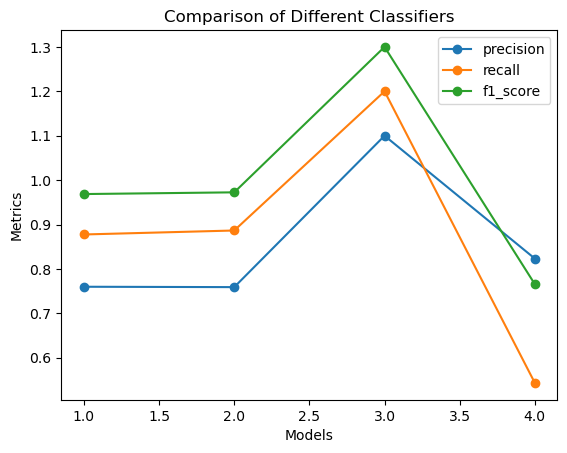

In [33]:
idx = [i for i in range(1,len(models.items())+1)]
idx_train = [i for i in range(0,len(models_scores_table['Model']), 2)]
idx_val = [i for i in range(1,len(models_scores_table['Model']),  2)]

for i in range(1, len(scoring.keys())):
    m_name = list(scoring.keys())[i]
    plt.plot(idx, 0.1*i+models_scores_table[m_name][idx_train]  ,marker='o' , label = m_name )

plt.xlabel("Models")
plt.ylabel("Metrics")
plt.title("Comparison of Different Classifiers")
plt.legend()
plt.show()

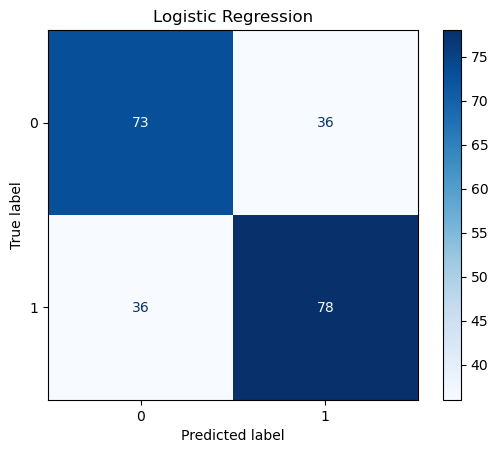

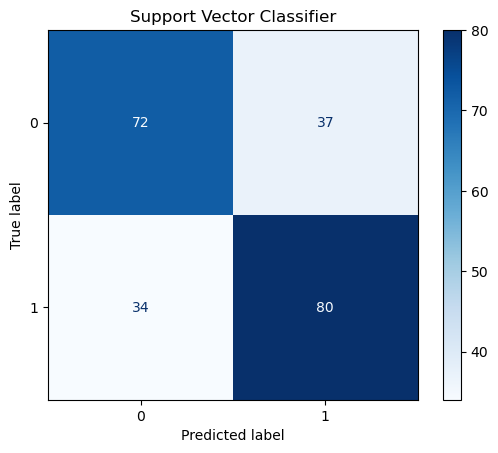

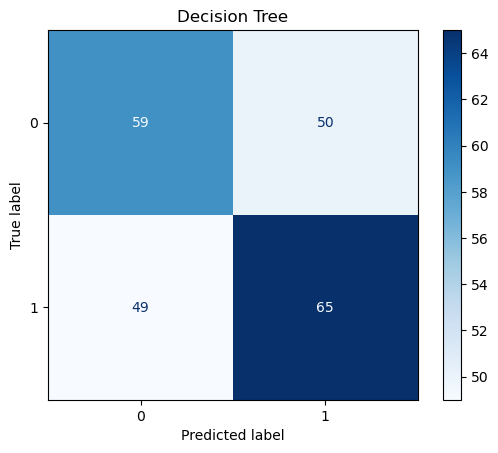

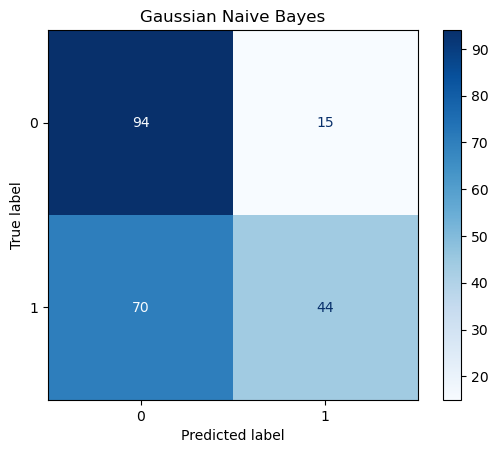

In [34]:
# Plot confusion matrix for each classifier
from sklearn.metrics import ConfusionMatrixDisplay
for name ,clf in models.items():
    disp = ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val, cmap=plt.cm.Blues)
    plt.title(name)
    #plt.savefig(f"{name}_confusion_matrix_seed_{seed}.png", dpi=1000)
    plt.show()

#### Factores que pueden afectar negativamente a cada clasificador

##### 1. Naive Bayes
- **Dependencia de las características**: Naive Bayes supone que las características son independientes, lo cual es raramente cierto en datos médicos. Si las características están correlacionadas, el modelo puede tener un desempeño subóptimo.
- **Distribución de los datos**: Supone que las características siguen una distribución específica (por ejemplo, gaussiana). Si los datos no cumplen con estas distribuciones, el modelo podría fallar.
- **Sensibilidad ruido**: Naive Bayes puede verse afectado si existen características irrelevantes en el conjunto de datos, lo que podría llevar a predicciones incorrectas si no se realiza una selección de características adecuada.


##### 2. Support Vector Machine (SVM)
- **Elección incorrecta de kernel**: La selección de un kernel inapropiado puede llevar a un sobreajuste o un subajuste del modelo, afectando su capacidad de generalización.
- **Datos no lineales sin kernel adecuado**: Si los datos no son linealmente separables y no se usa un kernel adecuado, el modelo no podrá encontrar una buena frontera de decisión.
- **Hiperparámetros mal ajustados**: El parámetro `C` controla el equilibrio entre maximizar el margen y minimizar los errores de clasificación. Si `C` es demasiado pequeño o grande, puede llevar a un mal rendimiento. Un ajuste incorrecto de `C` puede resultar en sobreajuste o subajuste.

##### 3. Árbol de Decisión
- **Sobreajuste**: Los árboles de decisión tienden a sobreajustarse a los datos de entrenamiento si no se podan adecuadamente. Esto ocurre cuando el árbol se vuelve muy complejo y captura el ruido en lugar de las tendencias generales.
- **Sensibilidad a pequeñas variaciones en los datos**: Un cambio pequeño en los datos de entrenamiento puede causar grandes cambios en la estructura del árbol, lo que lo hace inestable.
- **Escalabilidad en árboles profundos**: A medida que el árbol crece, su interpretación y eficiencia pueden deteriorarse, especialmente con muchas características como en este dataset.


##### 4. Regresión Logística
- **Relación no lineal entre características y clase**: La regresión logística asume que la relación entre las características y la clase es lineal. Si la relación es no lineal, el modelo no funcionará bien sin transformaciones adicionales.

**Ahora es tu turno!!!**

Intenta mejorar los clasificadores para resolver el problema en cuestión.

In [35]:
# YOUR CODE HERE :)